# Proyecto Final Machine Learning

- Linnethy Julieth Lambraño Pérez
- Diego Armando Corredor Rivera

### 1. Lectura de la base de datos

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Datos_Ob =pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

#Datos_Ob.info()



#### 1.1 Definición de X y Y

In [111]:
X = Datos_Ob
X = X.drop(['NObeyesdad'],axis = 1)

y = Datos_Ob["NObeyesdad"]


In [112]:
Datos_Ob.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 2. Tratamiento de variables

#### 2.1 Datos extremos

#### 2.1 Identificación de tipo de variables y valores faltantes

In [113]:
#Datos_Ob.info()
#Datos_Ob.describe()

Se evidencia que en la base de datos no se encuentra ninguna cantidad de nulos, por lo cual no hay necesidad de realizar algún método de imputación. Por otro lado con el head e info se puede observar el tipo de variables que hay en la base de datos, el cual se clasifica a continuación:

##### 1.Variables Númericas: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

##### 2.Variables Dummy: Gender, family_history_with_overweight, FAVC, SMOKE, SCC, MTRANS

##### 3.Variables Ordinales: CAEC, CALC


In [114]:
#Definición:

Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

#### 2.2 Identificación datos extremos variables numéricas

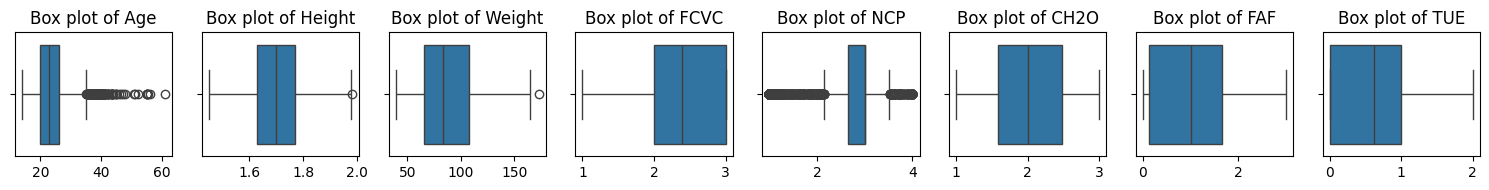

In [115]:

plt.figure(figsize=(15, 2))
for i, variable in enumerate(Numerica, 1):
    plt.subplot(1, 8, i)
    sns.boxplot(x=X[variable])
    plt.title(f'Box plot of {variable}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Dado que en las variables númericas como la edad se presenta valores continuos, se aplicara una transformación para convertir los datos y encontrar un buen ajuste del modelo.

In [117]:
X['Age'] = round(X['Age'],0)
X['FCVC'] = round(X['FCVC'],0)
X['NCP'] = round(X['NCP'],0)
X['CH2O'] = round(X['CH2O'],0)
X['FAF'] = round(X['FAF'],0)
X['TUE'] = round(X['TUE'],0)

#### 2.3 Definición de los tipos de variables

In [120]:
from sklearn.model_selection import train_test_split

Numerica = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

X_Numerica = X[Numerica]
X_Categorica = X[Categorica]
X_Ordinal = X[Ordinales]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### 3. Proceso por medio de pipeline

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Categorica_trans = OneHotEncoder(handle_unknown='ignore')
Numerical_trans = StandardScaler()
Ordinal_trans = OrdinalEncoder()


Preprocesamiento = ColumnTransformer(
    transformers=[
        ('Categorica', Categorica_trans, Categorica),
        ('Numerica', Numerical_trans, Numerica),
        ('Oridnal', Ordinal_trans, Ordinales)
    ])



In [85]:
#Ordinal_trans.fit_transform(X_train[Ordinales])

array([[2., 2.],
       [2., 2.],
       [2., 2.],
       ...,
       [2., 3.],
       [2., 2.],
       [1., 2.]])

In [122]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

Modelo_RF = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador", random_forest),
    ]
)
Modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador', RandomForestClassifier(random_state=42))])

In [123]:
primer_paso=Modelo_RF['Preprocesamiento']
primer_paso.get_feature_names_out()

array(['Categorica__Gender_Female', 'Categorica__Gender_Male',
       'Categorica__family_history_with_overweight_no',
       'Categorica__family_history_with_overweight_yes',
       'Categorica__FAVC_no', 'Categorica__FAVC_yes',
       'Categorica__SMOKE_no', 'Categorica__SMOKE_yes',
       'Categorica__SCC_no', 'Categorica__SCC_yes',
       'Categorica__MTRANS_Automobile', 'Categorica__MTRANS_Bike',
       'Categorica__MTRANS_Motorbike',
       'Categorica__MTRANS_Public_Transportation',
       'Categorica__MTRANS_Walking', 'Numerica__Age', 'Numerica__FCVC',
       'Numerica__NCP', 'Numerica__CH2O', 'Numerica__FAF',
       'Numerica__TUE', 'Oridnal__CAEC', 'Oridnal__CALC'], dtype=object)

In [124]:
DF=pd.DataFrame(primer_paso.transform(X_train), columns=primer_paso.get_feature_names_out())
DF

,Categorica__Gender_Female,Categorica__Gender_Male,Categorica__family_history_with_overweight_no,Categorica__family_history_with_overweight_yes,Categorica__FAVC_no,Categorica__FAVC_yes,Categorica__SMOKE_no,Categorica__SMOKE_yes,Categorica__SCC_no,Categorica__SCC_yes,...,Categorica__MTRANS_Public_Transportation,Categorica__MTRANS_Walking,Numerica__Age,Numerica__FCVC,Numerica__NCP,Numerica__CH2O,Numerica__FAF,Numerica__TUE,Oridnal__CAEC,Oridnal__CALC
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.205955,-0.743844,-2.100311,-0.049887,-1.131694,2.015133,2.0,2.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.364915,-0.743844,1.628428,1.412553,1.121729,0.509727,2.0,2.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-1.000756,-0.743844,0.385515,-0.049887,-1.131694,0.509727,2.0,2.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.065725,0.970137,0.385515,-0.049887,-0.004982,0.509727,2.0,2.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.682836,-0.743844,0.385515,-0.049887,-1.131694,-0.995679,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.205955,-0.743844,0.385515,-0.049887,1.121729,0.509727,2.0,2.0
1579,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2.019486,-0.743844,0.385515,-0.049887,-1.131694,-0.995679,2.0,2.0
1580,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.682836,-0.743844,0.385515,1.412553,1.121729,2.015133,2.0,3.0
1581,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.205955,-2.457824,0.385515,-0.049887,-0.004982,0.509727,2.0,2.0


In [125]:
feature_names = Modelo_RF[0:1].get_feature_names_out()

mdi_importances = pd.Series(
    Modelo_RF[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

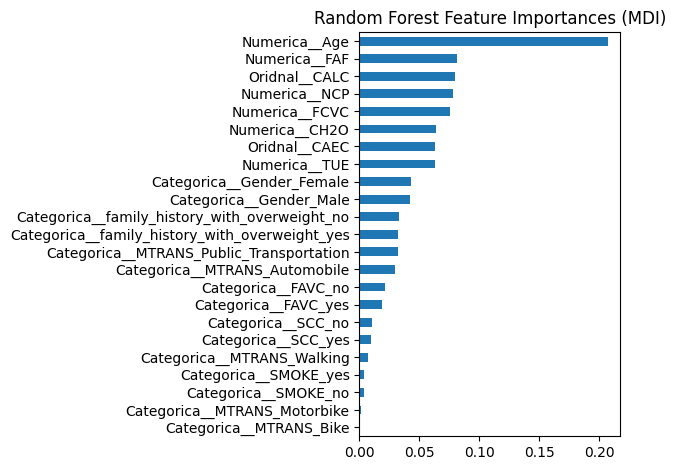

In [126]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

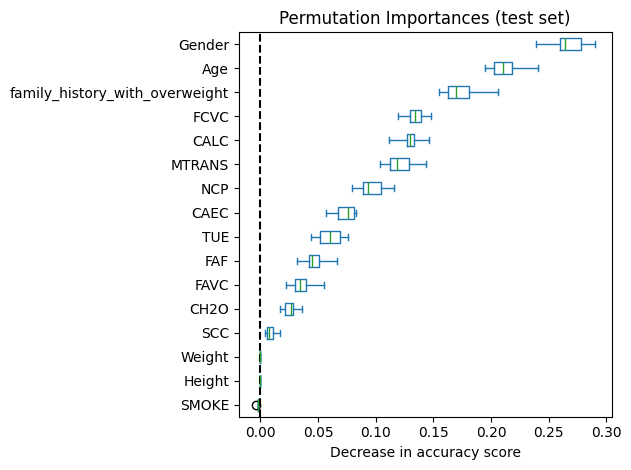

In [127]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [130]:
Modelo_RF.set_params(Clasificador__min_samples_leaf=20).fit(X_train, y_train)
print(f"RF train accuracy: {Modelo_RF.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {Modelo_RF.score(X_test, y_test):.3f}")

RF train accuracy: 0.678
RF test accuracy: 0.653


### Gridsearch

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(primer_paso.transform(X_train), y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [135]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Mean Accuracy: 0.797883640138961


### Evaluación del modelo

In [143]:
best_rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, random_state=0)
best_rf.fit(primer_paso.transform(X_train), y_train)
rf_test_accuracy = best_rf.score(primer_paso.transform(X_test), y_test)
print("Random Forest Test Accuracy:", rf_test_accuracy)

Random Forest Test Accuracy: 0.7859848484848485
